# Area
This notebook calculates the ETLocal keys of the Area section. 

TODO: add mermaid chart to describe how this notebook is structured (what goes in and what comes out, flows, ...)

## Import modules

In [1]:
import pandas as pd
from pathlib import Path
from IPython.display import Image, display
import importlib


import src.load_data_manager
import src.transform
import src.yaml_calculator
import src.helper
from src.load_data_manager import LoadDataManager
import config.yaml_to_diagram
from config.yaml_to_diagram import create_dependency_diagram

# Reload the modules to ensure latest version is used
importlib.reload(src.transform);
importlib.reload(src.yaml_calculator);
importlib.reload(src.helper);
importlib.reload(src.load_data_manager);
importlib.reload(config.yaml_to_diagram);

## General

Here we configure the notebook so that all contextual information is loaded and present for the other sections.

TODO: define list with ETLocal keys for which to run this notebook

Give this list as optional argument to helper functions so that if False for a key, then it is not updated in the template.

### Parameters

We first specify general parameters to be used throughout this notebook.

In [2]:
# Select the parent data set. Make sure to use the geo ID. It should be existing in the Dataset Manager.
parent = "nl"

# Specify the year and the reference year for the ETM
year = 2023
year_etm = 2019

# Specify the CSV-separator (presumably either "," or ";")
sep=","

# Specify where the dependency graphs are stored
dep_graph_folder = Path("config","etlocal_keys_final_demand_dependency_outputs", "output")

# Specify where the yaml files with calculation rules are stored
yaml_folder = Path("config","yaml_files_for_etlocal_key_calculation")

## Extract and Transform input data

In this section:
- We *Load* the relevant data from the data/intermediate folder
- We *Combine* the relevant data by merging municipal and national data

This is handled by the **ETLocalDataModule** which provides a unified interface for all data operations.

The module loads the following data sources:
- The ETLocal template (ETLocal_template_empty.csv)
- Klimaatmonitor data - both municipal and national levels with metadata:
  - km_source_data_converted.csv (municipal data)
  - km_meta_data_converted.csv (municipal metadata)
  - km_national_source_data_converted.csv (national data)
  - km_national_meta_data_converted.csv (national metadata)
- Transport research data (transport_research_cleaned.csv)
- Miscellaneous data (miscellaneous_data_analysis.csv)
- ETM query results (etm_query_combined.csv)

The module:
- Combines municipal-level data from different sources
- Combines national-level data from different sources
- Merges the municipal and national datasets into a single DataFrame
- Caches loaded data for improved performance

In [3]:
# Load and combine all input data
data_manager = LoadDataManager()
combined_data = data_manager.combine_all_data(
    include_miscellaneous=True,
    include_etm_queries=True,
)
combined_data

,Gemeentenaam,ProvinciecodePV,Provincienaam,no_inhabitants,no_residences,no_cars,total_energy_tj,tp_total_energy_tj,total_electricity_tj,total_gas_heat_tj_temp_corrected,...,mq_buildings_final_demand_for_lighting_electricity_buildings_lighting_led_electricity_parent_share,mq_buildings_final_demand_for_cooling_electricity_buildings_cooling_airconditioning_electricity_parent_share,mq_buildings_final_demand_for_cooling_electricity_buildings_cooling_heatpump_air_water_electricity_parent_share,mq_buildings_final_demand_for_cooling_electricity_buildings_cooling_collective_heatpump_water_water_ts_electricity_parent_share,mq_input_percentage_of_lt_steam_hot_water_buildings_final_demand_steam_hot_water,mq_input_percentage_of_mt_steam_hot_water_buildings_final_demand_steam_hot_water,mq_input_percentage_of_ht_steam_hot_water_buildings_final_demand_steam_hot_water,mq_input_percentage_of_lt_steam_hot_water_households_final_demand_steam_hot_water,mq_input_percentage_of_mt_steam_hot_water_households_final_demand_steam_hot_water,mq_input_percentage_of_ht_steam_hot_water_households_final_demand_steam_hot_water
GM0014,Groningen,PV20,Groningen,238147,122715,NaN,15294,4045,3218,8031,...,0.460186,0.918529,0.071604,0.009867,0.0,0.0,1.0,0.0,0.0,1.0
GM0034,Almere,PV24,Flevoland,222825,90690,NaN,10680,3869,2654,4289,...,0.460186,0.918529,0.071604,0.009867,0.0,0.0,1.0,0.0,0.0,1.0
GM0037,Stadskanaal,PV20,Groningen,32135,15177,NaN,1759,534,409,815,...,0.460186,0.918529,0.071604,0.009867,0.0,0.0,1.0,0.0,0.0,1.0
GM0047,Veendam,PV20,Groningen,27616,13013,NaN,0,580,786,0,...,0.460186,0.918529,0.071604,0.009867,0.0,0.0,1.0,0.0,0.0,1.0
GM0050,Zeewolde,PV24,Flevoland,23692,9354,NaN,3139,1581,765,794,...,0.460186,0.918529,0.071604,0.009867,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GM1979,Eemsdelta,PV20,Groningen,45394,23587,NaN,0,1049,2026,0,...,0.460186,0.918529,0.071604,0.009867,0.0,0.0,1.0,0.0,0.0,1.0
GM1980,Dijk en Waard,PV27,Noord-Holland,88985,37459,NaN,5168,1350,1110,2708,...,0.460186,0.918529,0.071604,0.009867,0.0,0.0,1.0,0.0,0.0,1.0
GM1982,Land van Cuijk,PV30,Noord-Brabant,91423,39868,NaN,9022,3179,2073,3769,...,0.460186,0.918529,0.071604,0.009867,0.0,0.0,1.0,0.0,0.0,1.0
GM1991,Maashorst,PV30,Noord-Brabant,58934,26012,NaN,4607,1761,1191,1655,...,0.460186,0.918529,0.071604,0.009867,0.0,0.0,1.0,0.0,0.0,1.0


In [4]:
# Load the template for the Area sector
df_template_local = data_manager.load_template(group = 'area')
df_template_local

unit  \
geo_id group subgroup              key                                                         
GM1680 area  area_emission_factors file_carriers_natural_gas_co2_conversion_per_mj     kg/MJ   
                                   file_carriers_crude_oil_co2_conversion_per_mj       kg/MJ   
                                   file_carriers_coal_co2_conversion_per_mj            kg/MJ   
                                   file_carriers_lignite_co2_conversion_per_mj         kg/MJ   
                                   file_carriers_non_biogenic_waste_co2_conversion...  kg/MJ   
...                                                                                      ...   
GM0193 area  area_infrastructure   heat_length_of_connection_pipelines_in_meter_pe...  meter   
                                   heat_length_of_connection_pipelines_in_meter_pe...  meter   
                                   heat_length_of_connection_pipelines_in_meter_pe...  meter   
                                   heat_length_of_connection_pipelines_in_meter_pe...  meter   
                                   heat_length_of_connection_pipelines_in_meter_pe...  meter   

                                                                                       value  \
geo_id group subgroup              key                                                         
GM1680 area  area_emission_factors file_carriers_natural_gas_co2_conversion_per_mj       NaN   
                                   file_carriers_crude_oil_co2_conversion_per_mj         NaN   
                                   file_carriers_coal_co2_conversion_per_mj              NaN   
                                   file_carriers_lignite_co2_conversion_per_mj           NaN   
                                   file_carriers_non_biogenic_waste_co2_conversion...    NaN   
...                                                                                      ...   
GM0193 area  area_infrastructure   heat_length_of_connection_pipelines_in_meter_pe...    NaN   
                                   heat_length_of_connection_pipelines_in_meter_pe...    NaN   
                                   heat_length_of_connection_pipelines_in_meter_pe...    NaN   
                                   heat_length_of_connection_pipelines_in_meter_pe...    NaN   
                                   heat_length_of_connection_pipelines_in_meter_pe...    NaN   

                                                                                      commit  
geo_id group subgroup              key                                                        
GM1680 area  area_emission_factors file_carriers_natural_gas_co2_conversion_per_mj       nan  
                                   file_carriers_crude_oil_co2_conversion_per_mj         nan  
                                   file_carriers_coal_co2_conversion_per_mj              nan  
                                   file_carriers_lignite_co2_conversion_per_mj           nan  
                                   file_carriers_non_biogenic_waste_co2_conversion...    nan  
...                                                                                      ...  
GM0193 area  area_infrastructure   heat_length_of_connection_pipelines_in_meter_pe...    nan  
                                   heat_length_of_connection_pipelines_in_meter_pe...    nan  
                                   heat_length_of_connection_pipelines_in_meter_pe...    nan  
                                   heat_length_of_connection_pipelines_in_meter_pe...    nan  
                                   heat_length_of_connection_pipelines_in_meter_pe...    nan  

[26334 rows x 3 columns]

## Infrastructure

### Gas net costs

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

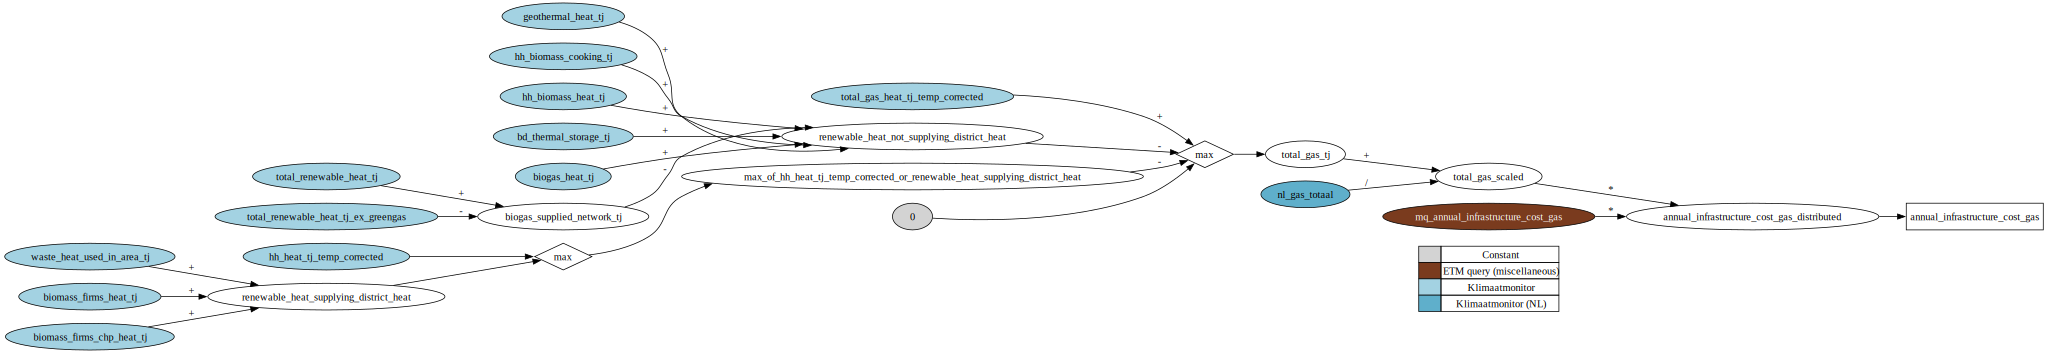

In [5]:
etlocal_key = 'annual_infrastructure_cost_gas'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key, 
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

Read information for the commit message

In [6]:
sector = 'area'
output_description = 'Annual gas net costs'
arithmic_op= 'multiply'
vars_description = ['national annual gas net costs', "municipality's share in total gas demand"]
vars_source = ['Net van de Toekomst, 2018', 'Klimaatmonitor']


message = src.helper.generate_commit_message(output_description,arithmic_op,vars_description,sector,year,vars_source)
print(message)


Annual gas net costs in the area sector is calculated by multiplying national annual gas net costs (Net van de Toekomst, 2018, 2023) by the municipality's share in total gas demand (Klimaatmonitor, 2023).


2. Calculate etlocal_key values

In [7]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=combined_data)
df_pipeline['commit'] = message
df_pipeline


,annual_infrastructure_cost_gas,biogas_supplied_network_tj,renewable_heat_not_supplying_district_heat,renewable_heat_supplying_district_heat,max_of_hh_heat_tj_temp_corrected_or_renewable_heat_supplying_district_heat,total_gas_tj,total_gas_scaled,annual_infrastructure_cost_gas_distributed,error_message,commit
GM0014,1.493944e+07,0.0,318.0,7.0,99.0,7614.0,0.010289,1.493944e+07,NaN,Annual gas net costs in the area sector is cal...
GM0034,4.538340e+06,0.0,463.0,27.0,1513.0,2313.0,0.003126,4.538340e+06,NaN,Annual gas net costs in the area sector is cal...
GM0037,1.448031e+06,0.0,62.0,15.0,15.0,738.0,0.000997,1.448031e+06,NaN,Annual gas net costs in the area sector is cal...
GM0047,0.000000e+00,0.0,54.0,0.0,0.0,0.0,0.000000,0.000000e+00,NaN,Annual gas net costs in the area sector is cal...
GM0050,1.393092e+06,0.0,29.0,6.0,55.0,710.0,0.000959,1.393092e+06,NaN,Annual gas net costs in the area sector is cal...
...,...,...,...,...,...,...,...,...,...,...
GM1979,0.000000e+00,0.0,96.0,3982.0,3982.0,0.0,0.000000,0.000000e+00,NaN,Annual gas net costs in the area sector is cal...
GM1980,4.918988e+06,0.0,103.0,0.0,98.0,2507.0,0.003388,4.918988e+06,NaN,Annual gas net costs in the area sector is cal...
GM1982,6.367018e+06,6.0,193.0,331.0,331.0,3245.0,0.004385,6.367018e+06,NaN,Annual gas net costs in the area sector is cal...
GM1991,2.947076e+06,0.0,83.0,70.0,70.0,1502.0,0.002030,2.947076e+06,NaN,Annual gas net costs in the area sector is cal...


3. Add data to template

In [8]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_infrastructure,€,1.493944e+07,Annual gas net costs in the area sector is cal...
GM0034,area,area_infrastructure,€,4.538340e+06,Annual gas net costs in the area sector is cal...
GM0037,area,area_infrastructure,€,1.448031e+06,Annual gas net costs in the area sector is cal...
GM0047,area,area_infrastructure,€,0.000000e+00,Annual gas net costs in the area sector is cal...
GM0050,area,area_infrastructure,€,1.393092e+06,Annual gas net costs in the area sector is cal...
...,...,...,...,...,...
GM1979,area,area_infrastructure,€,0.000000e+00,Annual gas net costs in the area sector is cal...
GM1980,area,area_infrastructure,€,4.918988e+06,Annual gas net costs in the area sector is cal...
GM1982,area,area_infrastructure,€,6.367018e+06,Annual gas net costs in the area sector is cal...


4. Use validation function to quick-scan data

In [9]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'annual_infrastructure_cost_gas',
 'total_rows': 342,
 'zero_count': 23,
 'nan_count': 0,
 'min_value': 0.0,
 'max_value': 196563296.00566468,
 'mean_value': 3426000.770815302,
 'median_value': 1570661.9929380575}

In [10]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)

  Key 'annual_infrastructure_cost_gas' not found in verification data


""


### LV net costs

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

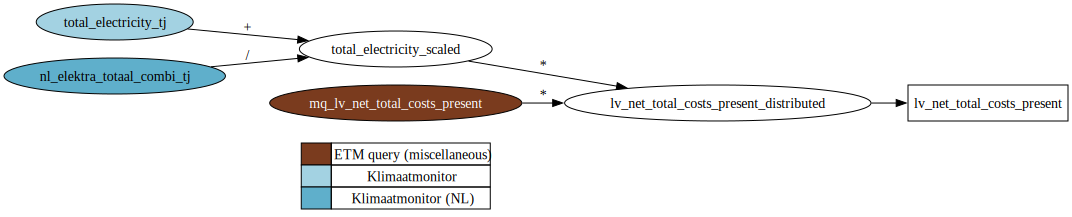

In [11]:
etlocal_key = 'lv_net_total_costs_present'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key, 
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

Read information for the commit message

In [12]:
sector = 'area'
output_description = 'Present LV net costs'
arithmic_op= 'multiply'
vars_description = ['national present LV net costs', "municipality's share in total electricity demand"]
vars_source = ['Klimaatmonitor', 'Klimaatmonitor']


message = src.helper.generate_commit_message(output_description,arithmic_op,vars_description,sector,year,vars_source)
print(message)


Present LV net costs in the area sector is calculated by multiplying national present LV net costs (Klimaatmonitor, 2023) by the municipality's share in total electricity demand (Klimaatmonitor, 2023).


2. Calculate etlocal_key values

In [13]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=combined_data)
df_pipeline['commit'] = message
df_pipeline


,lv_net_total_costs_present,total_electricity_scaled,lv_net_total_costs_present_distributed,error_message,commit
GM0014,7.726818e+06,0.009211,7.726818e+06,NaN,Present LV net costs in the area sector is cal...
GM0034,6.372584e+06,0.007597,6.372584e+06,NaN,Present LV net costs in the area sector is cal...
GM0037,9.820598e+05,0.001171,9.820598e+05,NaN,Present LV net costs in the area sector is cal...
GM0047,1.887284e+06,0.002250,1.887284e+06,NaN,Present LV net costs in the area sector is cal...
GM0050,1.836860e+06,0.002190,1.836860e+06,NaN,Present LV net costs in the area sector is cal...
...,...,...,...,...,...
GM1979,4.864678e+06,0.005799,4.864678e+06,NaN,Present LV net costs in the area sector is cal...
GM1980,2.665248e+06,0.003177,2.665248e+06,NaN,Present LV net costs in the area sector is cal...
GM1982,4.977531e+06,0.005934,4.977531e+06,NaN,Present LV net costs in the area sector is cal...
GM1991,2.859739e+06,0.003409,2.859739e+06,NaN,Present LV net costs in the area sector is cal...


3. Add data to template

In [14]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_infrastructure,€,7.726818e+06,Present LV net costs in the area sector is cal...
GM0034,area,area_infrastructure,€,6.372584e+06,Present LV net costs in the area sector is cal...
GM0037,area,area_infrastructure,€,9.820598e+05,Present LV net costs in the area sector is cal...
GM0047,area,area_infrastructure,€,1.887284e+06,Present LV net costs in the area sector is cal...
GM0050,area,area_infrastructure,€,1.836860e+06,Present LV net costs in the area sector is cal...
...,...,...,...,...,...
GM1979,area,area_infrastructure,€,4.864678e+06,Present LV net costs in the area sector is cal...
GM1980,area,area_infrastructure,€,2.665248e+06,Present LV net costs in the area sector is cal...
GM1982,area,area_infrastructure,€,4.977531e+06,Present LV net costs in the area sector is cal...


4. Use validation function to quick-scan data

In [15]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'lv_net_total_costs_present',
 'total_rows': 342,
 'zero_count': 0,
 'nan_count': 0,
 'min_value': 45621.360979344856,
 'max_value': 58059184.6568715,
 'mean_value': 2449132.705649846,
 'median_value': 1324220.030532036}

In [16]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: lv_net_total_costs_present
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  medium_diff: 226 municipalities (66.9%)
  large_diff: 76 municipalities (22.5%)
  small_diff: 36 municipalities (10.7%)

 VALUE STATISTICS:
  Template:     Min=45621.36, Max=58059184.66, Mean=2439769.58
  Verification: Min=39112.99, Max=56863390.20, Mean=2438517.48
  Abs diff:     Min=107.87, Max=12862711.35, Mean=277293.37

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM1979: Template=4864677.75, Verifica

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM1979,4.864678e+06,17727389.1,12862711.345045,-72.558408,large_diff
GM0971,6.843204e+05,7031135.766,6346815.35131,-90.267285,large_diff
GM0394,2.279867e+07,16517187.06,6281487.808362,38.030010,large_diff
GM1883,1.085548e+07,16715052.79,5859570.001178,-35.055648,large_diff
GM1966,1.251226e+07,7748974.234,4763284.295651,61.469869,large_diff
...,...,...,...,...,...
GM0096,7.443485e+04,75925.2226,1490.370476,-1.962945,medium_diff
GM0736,1.344630e+06,1343646.364,983.22276,0.073176,small_diff
GM0163,1.743216e+06,1743979.355,763.140737,-0.043759,small_diff
GM0114,4.499707e+06,4500295.012,588.144879,-0.013069,small_diff


### MV net costs

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

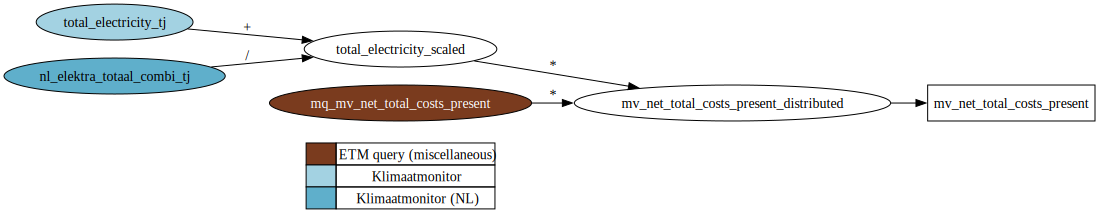

In [17]:
etlocal_key = 'mv_net_total_costs_present'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key, 
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

Read information for the commit message

In [18]:
sector = 'area'
output_description = 'Present MV net costs'
arithmic_op= 'multiply'
vars_description = ['national present MV net costs', "municipality's share in total electricity demand"]
vars_source = ['Klimaatmonitor', 'Klimaatmonitor']


message = src.helper.generate_commit_message(output_description,arithmic_op,vars_description,sector,year,vars_source)
print(message)

Present MV net costs in the area sector is calculated by multiplying national present MV net costs (Klimaatmonitor, 2023) by the municipality's share in total electricity demand (Klimaatmonitor, 2023).


2. Calculate etlocal_key values

In [19]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=combined_data)
df_pipeline['commit'] = message
df_pipeline

,mv_net_total_costs_present,total_electricity_scaled,mv_net_total_costs_present_distributed,error_message,commit
GM0014,6.640234e+06,0.009211,6.640234e+06,NaN,Present MV net costs in the area sector is cal...
GM0034,5.476439e+06,0.007597,5.476439e+06,NaN,Present MV net costs in the area sector is cal...
GM0037,8.439577e+05,0.001171,8.439577e+05,NaN,Present MV net costs in the area sector is cal...
GM0047,1.621884e+06,0.002250,1.621884e+06,NaN,Present MV net costs in the area sector is cal...
GM0050,1.578552e+06,0.002190,1.578552e+06,NaN,Present MV net costs in the area sector is cal...
...,...,...,...,...,...
GM1979,4.180582e+06,0.005799,4.180582e+06,NaN,Present MV net costs in the area sector is cal...
GM1980,2.290447e+06,0.003177,2.290447e+06,NaN,Present MV net costs in the area sector is cal...
GM1982,4.277565e+06,0.005934,4.277565e+06,NaN,Present MV net costs in the area sector is cal...
GM1991,2.457588e+06,0.003409,2.457588e+06,NaN,Present MV net costs in the area sector is cal...


3. Add data to template

In [20]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_infrastructure,€,6.640234e+06,Present MV net costs in the area sector is cal...
GM0034,area,area_infrastructure,€,5.476439e+06,Present MV net costs in the area sector is cal...
GM0037,area,area_infrastructure,€,8.439577e+05,Present MV net costs in the area sector is cal...
GM0047,area,area_infrastructure,€,1.621884e+06,Present MV net costs in the area sector is cal...
GM0050,area,area_infrastructure,€,1.578552e+06,Present MV net costs in the area sector is cal...
...,...,...,...,...,...
GM1979,area,area_infrastructure,€,4.180582e+06,Present MV net costs in the area sector is cal...
GM1980,area,area_infrastructure,€,2.290447e+06,Present MV net costs in the area sector is cal...
GM1982,area,area_infrastructure,€,4.277565e+06,Present MV net costs in the area sector is cal...


4. Use validation function to quick-scan data

In [21]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'mv_net_total_costs_present',
 'total_rows': 342,
 'zero_count': 0,
 'nan_count': 0,
 'min_value': 39205.857089330086,
 'max_value': 49894611.81157902,
 'mean_value': 2104723.418794664,
 'median_value': 1138001.5886718705}

In [22]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: mv_net_total_costs_present
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  medium_diff: 226 municipalities (66.9%)
  large_diff: 76 municipalities (22.5%)
  small_diff: 36 municipalities (10.7%)

 VALUE STATISTICS:
  Template:     Min=39205.86, Max=49894611.81, Mean=2096676.98
  Verification: Min=33612.73, Max=48866975.95, Mean=2095600.96
  Abs diff:     Min=92.70, Max=11053892.55, Mean=238298.99

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM1979: Template=4180582.45, Verificat

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM1979,4.180582e+06,15234475,11053892.55458,-72.558408,large_diff
GM0971,5.880879e+05,6042382.298,5454294.44166,-90.267285,large_diff
GM0394,1.959261e+07,14194457.63,5398153.583852,38.030009,large_diff
GM1883,9.328931e+06,14364498.49,5035567.968902,-35.055648,large_diff
GM1966,1.075272e+07,6659274.732,4093447.441289,61.469869,large_diff
...,...,...,...,...,...
GM0096,6.396745e+04,65248.23817,1280.78713,-1.962945,medium_diff
GM0736,1.155541e+06,1154696.094,844.957054,0.073176,small_diff
GM0163,1.498076e+06,1498732.259,655.824955,-0.043759,small_diff
GM0114,3.866936e+06,3867441.026,505.437294,-0.013069,small_diff


### HV net costs

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

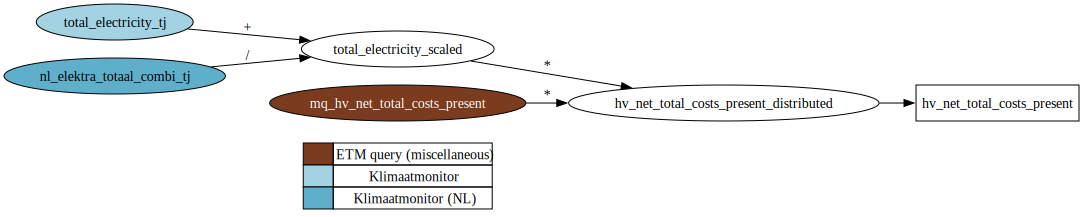

In [23]:
etlocal_key = 'hv_net_total_costs_present'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key, 
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

Read information for the commit message

In [24]:
sector = 'area'
output_description = 'Present HV net costs'
arithmic_op= 'multiply'
vars_description = ['national present HV net costs', "municipality's share in total electricity demand"]
vars_source = ['Klimaatmonitor', 'Klimaatmonitor']


message = src.helper.generate_commit_message(output_description,arithmic_op,vars_description,sector,year,vars_source)
print(message)

Present HV net costs in the area sector is calculated by multiplying national present HV net costs (Klimaatmonitor, 2023) by the municipality's share in total electricity demand (Klimaatmonitor, 2023).


2. Calculate etlocal_key values

In [25]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=combined_data)
df_pipeline['commit'] = message
df_pipeline

,hv_net_total_costs_present,total_electricity_scaled,hv_net_total_costs_present_distributed,error_message,commit
GM0014,3.902043e+06,0.009211,3.902043e+06,NaN,Present HV net costs in the area sector is cal...
GM0034,3.218155e+06,0.007597,3.218155e+06,NaN,Present HV net costs in the area sector is cal...
GM0037,4.959402e+05,0.001171,4.959402e+05,NaN,Present HV net costs in the area sector is cal...
GM0047,9.530783e+05,0.002250,9.530783e+05,NaN,Present HV net costs in the area sector is cal...
GM0050,9.276143e+05,0.002190,9.276143e+05,NaN,Present HV net costs in the area sector is cal...
...,...,...,...,...,...
GM1979,2.456662e+06,0.005799,2.456662e+06,NaN,Present HV net costs in the area sector is cal...
GM1980,1.345950e+06,0.003177,1.345950e+06,NaN,Present HV net costs in the area sector is cal...
GM1982,2.513653e+06,0.005934,2.513653e+06,NaN,Present HV net costs in the area sector is cal...
GM1991,1.444168e+06,0.003409,1.444168e+06,NaN,Present HV net costs in the area sector is cal...


3. Add data to template

In [26]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_infrastructure,€,3.902043e+06,Present HV net costs in the area sector is cal...
GM0034,area,area_infrastructure,€,3.218155e+06,Present HV net costs in the area sector is cal...
GM0037,area,area_infrastructure,€,4.959402e+05,Present HV net costs in the area sector is cal...
GM0047,area,area_infrastructure,€,9.530783e+05,Present HV net costs in the area sector is cal...
GM0050,area,area_infrastructure,€,9.276143e+05,Present HV net costs in the area sector is cal...
...,...,...,...,...,...
GM1979,area,area_infrastructure,€,2.456662e+06,Present HV net costs in the area sector is cal...
GM1980,area,area_infrastructure,€,1.345950e+06,Present HV net costs in the area sector is cal...
GM1982,area,area_infrastructure,€,2.513653e+06,Present HV net costs in the area sector is cal...


4. Use validation function to quick-scan data

In [27]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'hv_net_total_costs_present',
 'total_rows': 342,
 'zero_count': 0,
 'nan_count': 0,
 'min_value': 23038.787295194586,
 'max_value': 29319888.252516054,
 'mean_value': 1236812.016386748,
 'median_value': 668731.1154368323}

In [28]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: hv_net_total_costs_present
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  medium_diff: 226 municipalities (66.9%)
  large_diff: 76 municipalities (22.5%)
  small_diff: 36 municipalities (10.7%)

 VALUE STATISTICS:
  Template:     Min=23038.79, Max=29319888.25, Mean=1232083.64
  Verification: Min=19752.06, Max=28716012.05, Mean=1231451.33
  Abs diff:     Min=54.48, Max=6495669.23, Mean=140033.15

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM1979: Template=2456662.27, Verificati

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM1979,2.456662e+06,8952331.493,6495669.226681,-72.558408,large_diff
GM0971,3.455818e+05,3550723.562,3205141.752572,-90.267285,large_diff
GM0394,1.151333e+07,8341179.467,3172151.341835,38.030009,large_diff
GM1883,5.482019e+06,8441101.661,2959082.852496,-35.055648,large_diff
GM1966,6.318691e+06,3913231.988,2405458.569645,61.469869,large_diff
...,...,...,...,...,...
GM0096,3.758960e+04,38342.23741,752.637086,-1.962945,medium_diff
GM0736,6.790379e+05,678541.4136,496.527732,0.073176,small_diff
GM0163,8.803242e+05,880709.5745,385.386273,-0.043759,small_diff
GM0114,2.272352e+06,2272648.981,297.013042,-0.013069,small_diff


### LV-MV trafo costs

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

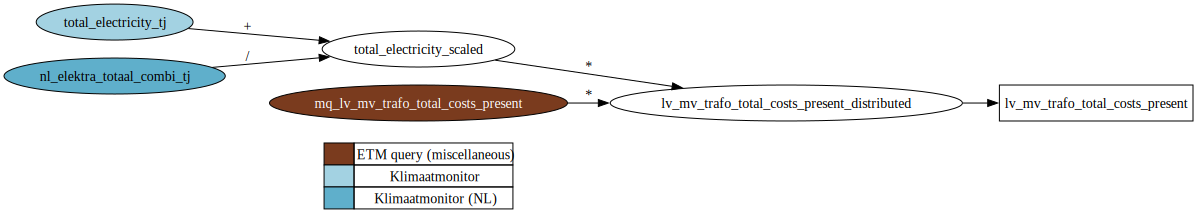

In [29]:
etlocal_key = 'lv_mv_trafo_total_costs_present'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key, 
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

Read information for the commit message

In [30]:
sector = 'area'
output_description = 'Present LV-MV transformer costs'
arithmic_op= 'multiply'
vars_description = ['national present LV-MV transformer costs', "municipality's share in total electricity demand"]
vars_source = ['Klimaatmonitor', 'Klimaatmonitor']


message = src.helper.generate_commit_message(output_description,arithmic_op,vars_description,sector,year,vars_source)
print(message)

Present LV-MV transformer costs in the area sector is calculated by multiplying national present LV-MV transformer costs (Klimaatmonitor, 2023) by the municipality's share in total electricity demand (Klimaatmonitor, 2023).


2. Calculate etlocal_key values

In [31]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=combined_data)
df_pipeline['commit'] = message
df_pipeline

,lv_mv_trafo_total_costs_present,total_electricity_scaled,lv_mv_trafo_total_costs_present_distributed,error_message,commit
GM0014,2.752679e+06,0.009211,2.752679e+06,NaN,Present LV-MV transformer costs in the area se...
GM0034,2.270233e+06,0.007597,2.270233e+06,NaN,Present LV-MV transformer costs in the area se...
GM0037,3.498588e+05,0.001171,3.498588e+05,NaN,Present LV-MV transformer costs in the area se...
GM0047,6.723448e+05,0.002250,6.723448e+05,NaN,Present LV-MV transformer costs in the area se...
GM0050,6.543814e+05,0.002190,6.543814e+05,NaN,Present LV-MV transformer costs in the area se...
...,...,...,...,...,...
GM1979,1.733041e+06,0.005799,1.733041e+06,NaN,Present LV-MV transformer costs in the area se...
GM1980,9.494946e+05,0.003177,9.494946e+05,NaN,Present LV-MV transformer costs in the area se...
GM1982,1.773245e+06,0.005934,1.773245e+06,NaN,Present LV-MV transformer costs in the area se...
GM1991,1.018782e+06,0.003409,1.018782e+06,NaN,Present LV-MV transformer costs in the area se...


3. Add data to template

In [32]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_infrastructure,€,2.752679e+06,Present LV-MV transformer costs in the area se...
GM0034,area,area_infrastructure,€,2.270233e+06,Present LV-MV transformer costs in the area se...
GM0037,area,area_infrastructure,€,3.498588e+05,Present LV-MV transformer costs in the area se...
GM0047,area,area_infrastructure,€,6.723448e+05,Present LV-MV transformer costs in the area se...
GM0050,area,area_infrastructure,€,6.543814e+05,Present LV-MV transformer costs in the area se...
...,...,...,...,...,...
GM1979,area,area_infrastructure,€,1.733041e+06,Present LV-MV transformer costs in the area se...
GM1980,area,area_infrastructure,€,9.494946e+05,Present LV-MV transformer costs in the area se...
GM1982,area,area_infrastructure,€,1.773245e+06,Present LV-MV transformer costs in the area se...


4. Use validation function to quick-scan data

In [33]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'lv_mv_trafo_total_costs_present',
 'total_rows': 342,
 'zero_count': 0,
 'nan_count': 0,
 'min_value': 16252.609849265506,
 'max_value': 20683584.53448631,
 'mean_value': 872503.5264078301,
 'median_value': 471753.3858878908}

In [34]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: lv_mv_trafo_total_costs_present
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  medium_diff: 226 municipalities (66.9%)
  large_diff: 76 municipalities (22.5%)
  small_diff: 36 municipalities (10.7%)

 VALUE STATISTICS:
  Template:     Min=16252.61, Max=20683584.53, Mean=869167.91
  Verification: Min=13934.00, Max=20257582.76, Mean=868721.85
  Abs diff:     Min=38.43, Max=4582340.91, Mean=98785.76

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM1979: Template=1733041.45, Verifica

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM1979,1.733041e+06,6315382.365,4582340.914757,-72.558408,large_diff
GM0971,2.437891e+05,2504842.117,2261052.969261,-90.267285,large_diff
GM0394,8.122028e+06,5884247.891,2237780.031041,38.030009,large_diff
GM1883,3.867266e+06,5954737.558,2087471.814393,-35.055648,large_diff
GM1966,4.457492e+06,2760572.071,1696920.030291,61.469869,large_diff
...,...,...,...,...,...
GM0096,2.651742e+04,27048.36055,530.94448,-1.962945,medium_diff
GM0736,4.790243e+05,478674.017,350.273294,0.073176,small_diff
GM0163,6.210208e+05,621292.6454,271.869054,-0.043759,small_diff
GM0114,1.603021e+06,1603230.098,209.526551,-0.013069,small_diff


### MV-HV trafo costs

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

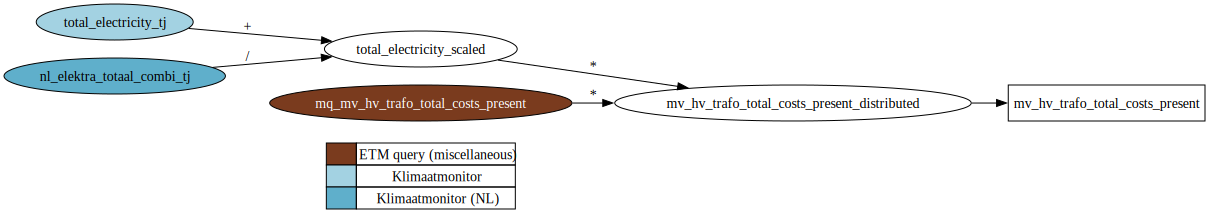

In [35]:
etlocal_key = 'mv_hv_trafo_total_costs_present'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key, 
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

Read information for the commit message

In [36]:
sector = 'area'
output_description = 'Present MV-HV transformer costs'
arithmic_op= 'multiply'
vars_description = ['national present MV-HV transformer costs', "municipality's share in total electricity demand"]
vars_source = ['Klimaatmonitor', 'Klimaatmonitor']


message = src.helper.generate_commit_message(output_description,arithmic_op,vars_description,sector,year,vars_source)
print(message)

Present MV-HV transformer costs in the area sector is calculated by multiplying national present MV-HV transformer costs (Klimaatmonitor, 2023) by the municipality's share in total electricity demand (Klimaatmonitor, 2023).


2. Calculate etlocal_key values

In [37]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=combined_data)
df_pipeline['commit'] = message
df_pipeline

,mv_hv_trafo_total_costs_present,total_electricity_scaled,mv_hv_trafo_total_costs_present_distributed,error_message,commit
GM0014,2.318045e+06,0.009211,2.318045e+06,NaN,Present MV-HV transformer costs in the area se...
GM0034,1.911775e+06,0.007597,1.911775e+06,NaN,Present MV-HV transformer costs in the area se...
GM0037,2.946179e+05,0.001171,2.946179e+05,NaN,Present MV-HV transformer costs in the area se...
GM0047,5.661851e+05,0.002250,5.661851e+05,NaN,Present MV-HV transformer costs in the area se...
GM0050,5.510580e+05,0.002190,5.510580e+05,NaN,Present MV-HV transformer costs in the area se...
...,...,...,...,...,...
GM1979,1.459403e+06,0.005799,1.459403e+06,NaN,Present MV-HV transformer costs in the area se...
GM1980,7.995744e+05,0.003177,7.995744e+05,NaN,Present MV-HV transformer costs in the area se...
GM1982,1.493259e+06,0.005934,1.493259e+06,NaN,Present MV-HV transformer costs in the area se...
GM1991,8.579217e+05,0.003409,8.579217e+05,NaN,Present MV-HV transformer costs in the area se...


3. Add data to template

In [38]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_infrastructure,€,2.318045e+06,Present MV-HV transformer costs in the area se...
GM0034,area,area_infrastructure,€,1.911775e+06,Present MV-HV transformer costs in the area se...
GM0037,area,area_infrastructure,€,2.946179e+05,Present MV-HV transformer costs in the area se...
GM0047,area,area_infrastructure,€,5.661851e+05,Present MV-HV transformer costs in the area se...
GM0050,area,area_infrastructure,€,5.510580e+05,Present MV-HV transformer costs in the area se...
...,...,...,...,...,...
GM1979,area,area_infrastructure,€,1.459403e+06,Present MV-HV transformer costs in the area se...
GM1980,area,area_infrastructure,€,7.995744e+05,Present MV-HV transformer costs in the area se...
GM1982,area,area_infrastructure,€,1.493259e+06,Present MV-HV transformer costs in the area se...


4. Use validation function to quick-scan data

In [39]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'mv_hv_trafo_total_costs_present',
 'total_rows': 342,
 'zero_count': 0,
 'nan_count': 0,
 'min_value': 13686.4082932596,
 'max_value': 17417755.39636932,
 'mean_value': 734739.8116657574,
 'median_value': 397266.00914382463}

In [40]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: mv_hv_trafo_total_costs_present
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  medium_diff: 226 municipalities (66.9%)
  large_diff: 76 municipalities (22.5%)
  small_diff: 36 municipalities (10.7%)

 VALUE STATISTICS:
  Template:     Min=13686.41, Max=17417755.40, Mean=731930.87
  Verification: Min=11733.90, Max=17059017.06, Mean=731555.24
  Abs diff:     Min=32.36, Max=3858813.40, Mean=83188.01

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM1979: Template=1459403.33, Verifica

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM1979,1.459403e+06,5318216.728,3858813.401571,-72.558408,large_diff
GM0971,2.052961e+05,2109340.73,1904044.605601,-90.267285,large_diff
GM0394,6.839602e+06,4955156.118,1884446.342237,38.030009,large_diff
GM1883,3.256645e+06,5014515.838,1757871.001483,-35.055648,large_diff
GM1966,3.753678e+06,2324692.27,1428985.288746,61.469869,large_diff
...,...,...,...,...,...
GM0096,2.233046e+04,22777.56678,447.111144,-1.962945,medium_diff
GM0736,4.033889e+05,403093.9091,294.966912,0.073176,small_diff
GM0163,5.229649e+05,523193.8066,228.942342,-0.043759,small_diff
GM0114,1.349912e+06,1350088.504,176.443917,-0.013069,small_diff


### Offshore net costs

Since the offshore net is only available on a national level, the net costs are zero for all municipalities.

In [41]:
# Set offshore net costs to zero for all municipalities
etlocal_key = 'offshore_net_costs_present'
df_template_local = src.helper.fill_template_with_uniform_value_etlocal_data(etlocal_key, 0, df_template_local)

# Validate the result
validation_results = src.helper.validate_template_data(df_template_local, etlocal_key)
print(f"Validation results: {validation_results}")

# preview data
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]


Validation results: {'key': 'offshore_net_costs_present', 'total_rows': 342, 'zero_count': 342, 'nan_count': 0, 'min_value': 0.0, 'max_value': 0.0, 'mean_value': 0.0, 'median_value': 0.0}


,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM0034,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM0037,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM0047,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM0050,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
...,...,...,...,...,...
GM1979,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM1980,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM1982,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...


### Interconnection net costs

Since the interconnection net is only available on a national level, the net costs are zero for all municipalities.

In [42]:
# Set offshore net costs to zero for all municipalities
etlocal_key = 'interconnection_net_costs_present'
df_template_local = src.helper.fill_template_with_uniform_value_etlocal_data(etlocal_key, 0, df_template_local)

# Validate the result
validation_results = src.helper.validate_template_data(df_template_local, etlocal_key)
print(f"Validation results: {validation_results}")

# preview data
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]


Validation results: {'key': 'interconnection_net_costs_present', 'total_rows': 342, 'zero_count': 342, 'nan_count': 0, 'min_value': 0.0, 'max_value': 0.0, 'mean_value': 0.0, 'median_value': 0.0}


,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM0034,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM0037,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM0047,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM0050,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
...,...,...,...,...,...
GM1979,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM1980,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...
GM1982,area,area_infrastructure,€,0.0,No data available. Set to 0 for all municipali...


### Interconnector capacity



The interconnector capacity is hard-coded for all municipalities

In [43]:
etlocal_key = 'interconnector_capacity'
df_template_local = src.helper.fill_template_with_uniform_value_etlocal_data(etlocal_key, 60000, df_template_local)

# Validate the result
validation_results = src.helper.validate_template_data(df_template_local, etlocal_key)
print(f"Validation results: {validation_results}")
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

# preview data

Validation results: {'key': 'interconnector_capacity', 'total_rows': 342, 'zero_count': 0, 'nan_count': 0, 'min_value': 60000.0, 'max_value': 60000.0, 'mean_value': 60000.0, 'median_value': 60000.0}


,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_infrastructure,MW,60000.0,No data available. Set to a large value (60000...
GM0034,area,area_infrastructure,MW,60000.0,No data available. Set to a large value (60000...
GM0037,area,area_infrastructure,MW,60000.0,No data available. Set to a large value (60000...
GM0047,area,area_infrastructure,MW,60000.0,No data available. Set to a large value (60000...
GM0050,area,area_infrastructure,MW,60000.0,No data available. Set to a large value (60000...
...,...,...,...,...,...
GM1979,area,area_infrastructure,MW,60000.0,No data available. Set to a large value (60000...
GM1980,area,area_infrastructure,MW,60000.0,No data available. Set to a large value (60000...
GM1982,area,area_infrastructure,MW,60000.0,No data available. Set to a large value (60000...


## Geography

### Total land area

In [44]:
etlocal_key = 'total_land_area'
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=combined_data)


In [45]:
message = "‘Totaal land (excl. buitenland)’ from ‘bestand Bodemgebruik’."
print(message)
df_pipeline['commit'] = message

‘Totaal land (excl. buitenland)’ from ‘bestand Bodemgebruik’.


Add data to template

In [46]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_geography,km<sup>2</sup>,185.525439,‘Totaal land (excl. buitenland)’ from ‘bestand...
GM0034,area,area_geography,km<sup>2</sup>,129.179457,‘Totaal land (excl. buitenland)’ from ‘bestand...
GM0037,area,area_geography,km<sup>2</sup>,117.629890,‘Totaal land (excl. buitenland)’ from ‘bestand...
GM0047,area,area_geography,km<sup>2</sup>,75.933265,‘Totaal land (excl. buitenland)’ from ‘bestand...
GM0050,area,area_geography,km<sup>2</sup>,247.107889,‘Totaal land (excl. buitenland)’ from ‘bestand...
...,...,...,...,...,...
GM1979,area,area_geography,km<sup>2</sup>,268.070114,‘Totaal land (excl. buitenland)’ from ‘bestand...
GM1980,area,area_geography,km<sup>2</sup>,61.899245,‘Totaal land (excl. buitenland)’ from ‘bestand...
GM1982,area,area_geography,km<sup>2</sup>,341.262224,‘Totaal land (excl. buitenland)’ from ‘bestand...


Use validation function to quick-scan data

In [47]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'total_land_area',
 'total_rows': 342,
 'zero_count': 0,
 'nan_count': 0,
 'min_value': 7.013962651,
 'max_value': 522.6970991,
 'mean_value': 98.38370755905557,
 'median_value': 75.4812007}

In [48]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: total_land_area
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  small_diff: 319 municipalities (94.4%)
  large_diff: 12 municipalities (3.6%)
  medium_diff: 7 municipalities (2.1%)

 VALUE STATISTICS:
  Template:     Min=7.01, Max=522.70, Mean=97.59
  Verification: Min=0.00, Max=499.81, Mean=96.07
  Abs diff:     Min=0.00, Max=90.58, Mean=1.80

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM0014: Template=185.53, Verification=94.95, Diff=90.58 (95.4%)
  Municipality GM0080: Templ

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:379: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  / comparison["verification_value"].replace(0, float("inf"))
/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM0014,185.525439,94.95,90.575439,95.392774,large_diff
GM0080,237.554441,154.06,83.494441,54.196054,large_diff
GM0439,93.607462,23.03,70.577462,306.458801,large_diff
GM1900,522.697099,454.56,68.137099,14.989682,large_diff
GM0164,60.841271,0,60.841271,0.000000,small_diff
...,...,...,...,...,...
GM0202,97.739964,97.74,0.000036,-0.000037,small_diff
GM0983,124.160024,124.16,0.000024,0.000019,small_diff
GM1931,148.319979,148.32,0.000021,-0.000014,small_diff
GM1740,59.990014,59.99,0.000014,0.000023,small_diff


### Areable land

In [49]:
etlocal_key = 'areable_land'
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=combined_data)

In [50]:
message = "‘Agrarisch terrein’ from ‘bestand Bodemgebruik’ (2017) corrected to municipalities according to 2023 (CBS) https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/bestand-bodemgebruik."
print(message)
df_pipeline['commit'] = message

‘Agrarisch terrein’ from ‘bestand Bodemgebruik’ (2017) corrected to municipalities according to 2023 (CBS) https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/bestand-bodemgebruik.


Add data to template

In [51]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_geography,km<sup>2</sup>,107.775864,‘Agrarisch terrein’ from ‘bestand Bodemgebruik...
GM0034,area,area_geography,km<sup>2</sup>,32.413440,‘Agrarisch terrein’ from ‘bestand Bodemgebruik...
GM0037,area,area_geography,km<sup>2</sup>,93.094045,‘Agrarisch terrein’ from ‘bestand Bodemgebruik...
GM0047,area,area_geography,km<sup>2</sup>,57.000794,‘Agrarisch terrein’ from ‘bestand Bodemgebruik...
GM0050,area,area_geography,km<sup>2</sup>,173.078256,‘Agrarisch terrein’ from ‘bestand Bodemgebruik...
...,...,...,...,...,...
GM1979,area,area_geography,km<sup>2</sup>,225.543560,‘Agrarisch terrein’ from ‘bestand Bodemgebruik...
GM1980,area,area_geography,km<sup>2</sup>,32.636212,‘Agrarisch terrein’ from ‘bestand Bodemgebruik...
GM1982,area,area_geography,km<sup>2</sup>,252.352994,‘Agrarisch terrein’ from ‘bestand Bodemgebruik...


Use validation function to quick-scan data

In [52]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'areable_land',
 'total_rows': 342,
 'zero_count': 0,
 'nan_count': 0,
 'min_value': 0.105881717,
 'max_value': 458.4283876,
 'mean_value': 65.21774131843861,
 'median_value': 42.0451848}

In [53]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: areable_land
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  small_diff: 262 municipalities (77.5%)
  medium_diff: 52 municipalities (15.4%)
  large_diff: 24 municipalities (7.1%)

 VALUE STATISTICS:
  Template:     Min=0.11, Max=458.43, Mean=64.67
  Verification: Min=0.00, Max=407.22, Mean=63.06
  Abs diff:     Min=0.00, Max=76.41, Mean=1.86

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM0080: Template=178.48, Verification=102.07, Diff=76.41 (74.9%)
  Municipality GM0014: Templ

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:379: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  / comparison["verification_value"].replace(0, float("inf"))
/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM0080,178.477084,102.07,76.407084,74.857533,large_diff
GM0014,107.775864,40,67.775864,169.439661,large_diff
GM1900,458.428388,393.31,65.118388,16.556504,large_diff
GM0439,67.250476,2.6,64.650476,2486.556781,large_diff
GM1783,48.191680,9.73,38.46168,395.289619,large_diff
...,...,...,...,...,...
GM0852,44.940160,44.94,0.00016,0.000355,small_diff
GM1950,236.180154,236.18,0.000154,0.000065,small_diff
GM0866,8.510153,8.51,0.000153,0.001794,small_diff
GM0373,41.800120,41.8,0.00012,0.000288,small_diff


### Coast line

In [54]:
etlocal_key = 'coast_line'
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=combined_data)

In [55]:
message = "Estimate based on the most recent land use data (CBS, 2017) with the category ‘Buitenwater’. The assumption is that 1 square kilometre of water corresponds to 1 kilometre of coastline. https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/bestand-bodemgebruik."
print(message)
df_pipeline['commit'] = message

Estimate based on the most recent land use data (CBS, 2017) with the category ‘Buitenwater’. The assumption is that 1 square kilometre of water corresponds to 1 kilometre of coastline. https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/bestand-bodemgebruik.


Add data to template

In [56]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,area,area_geography,km,0.000000,Estimate based on the most recent land use dat...
GM0034,area,area_geography,km,0.000000,Estimate based on the most recent land use dat...
GM0037,area,area_geography,km,0.000000,Estimate based on the most recent land use dat...
GM0047,area,area_geography,km,0.000000,Estimate based on the most recent land use dat...
GM0050,area,area_geography,km,0.000000,Estimate based on the most recent land use dat...
...,...,...,...,...,...
GM1979,area,area_geography,km,91.198267,Estimate based on the most recent land use dat...
GM1980,area,area_geography,km,0.000000,Estimate based on the most recent land use dat...
GM1982,area,area_geography,km,0.000000,Estimate based on the most recent land use dat...


Use validation function to quick-scan data

In [57]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'coast_line',
 'total_rows': 342,
 'zero_count': 300,
 'nan_count': 0,
 'min_value': 0.0,
 'max_value': 586.2831704,
 'mean_value': 12.140673736669592,
 'median_value': 0.0}

In [58]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: coast_line
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  exact_match: 297 municipalities (87.9%)
  small_diff: 39 municipalities (11.5%)
  medium_diff: 2 municipalities (0.6%)

 VALUE STATISTICS:
  Template:     Min=0.00, Max=586.28, Mean=12.17
  Verification: Min=0.00, Max=586.28, Mean=12.17
  Abs diff:     Min=0.00, Max=4.47, Mean=0.03

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM1966: Template=408.52, Verification=412.99, Diff=4.47 (-1.1%)
  Municipality GM0088: Template=

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:379: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  / comparison["verification_value"].replace(0, float("inf"))
/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM1966,408.515881,412.99,4.474119,-1.083348,medium_diff
GM0088,160.230185,155.76,4.470185,2.869919,medium_diff
GM1970,119.628326,119.62,0.008326,0.006961,small_diff
GM0575,15.544459,15.54,0.004459,0.028695,small_diff
GM1695,28.505645,28.51,0.004355,-0.015276,small_diff
...,...,...,...,...,...
GM0385,0.000000,0,0.0,0.000000,exact_match
GM0384,0.000000,0,0.0,0.000000,exact_match
GM0376,0.000000,0,0.0,0.000000,exact_match
GM0363,0.000000,0,0.0,0.000000,exact_match


## Export
Write the resulting filled template to a csv

In [59]:
# Write the filled template to a CSV file
path_output = Path("data", "processed", f"etlocal_template_area_filled.csv")
df_template_local.to_csv(path_output, sep=sep)
